In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import sklearn.cluster as cluster
import sklearn.cluster as KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_data.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

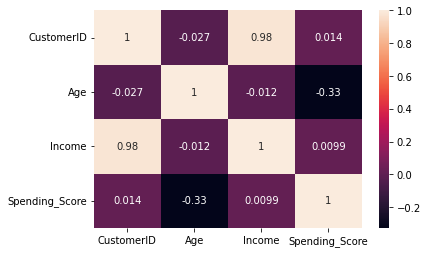

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
df= df.apply(LabelEncoder().fit_transform)
df

,CustomerID,Gender,Age,Income,Spending_Score
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31
...,...,...,...,...,...
195,195,0,17,61,66
196,196,0,27,62,23
197,197,1,14,62,61
198,198,1,14,63,16


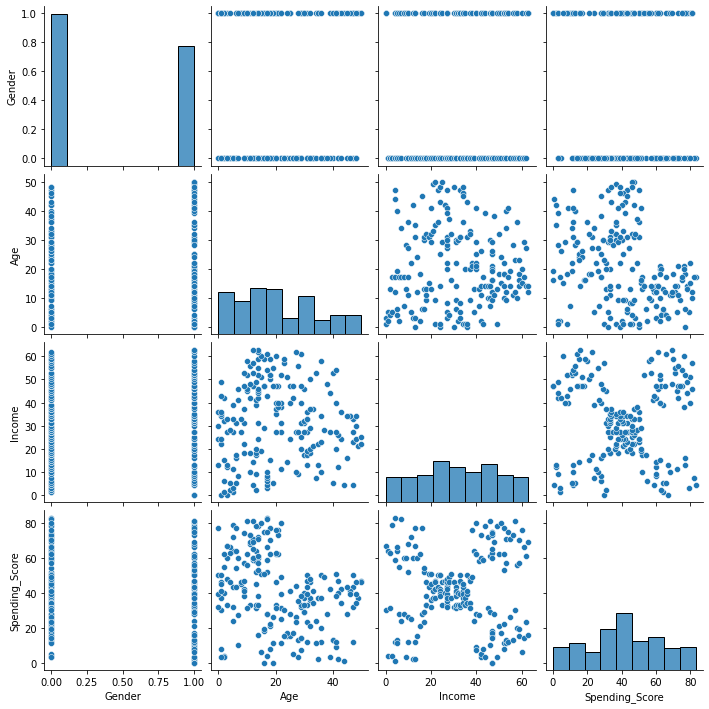

In [6]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Gender','Age','Income', 'Spending_Score']])

In [7]:
X=df.iloc[:, 2:].values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[-1.44683356, -1.88641296, -0.52396837],
       [-1.29979763, -1.88641296,  1.18337022],
       [-1.37331559, -1.82738877, -1.72371982],
       [-1.15276169, -1.82738877,  1.04493737],
       [-0.56461797, -1.76836459, -0.47782409],
       [-1.22627966, -1.76836459,  0.99879308],
       [-0.27054611, -1.7093404 , -1.72371982],
       [-1.15276169, -1.7093404 ,  1.73710166],
       [ 1.71443895, -1.65031622, -1.86215268],
       [-0.63813594, -1.65031622,  0.81421593],
       [ 1.93499284, -1.65031622, -1.35456553],
       [-0.27054611, -1.65031622,  1.92167881],
       [ 1.42036709, -1.59129203, -1.30842124],
       [-1.07924373, -1.59129203,  1.04493737],
       [-0.12351018, -1.59129203, -1.40070981],
       [-1.22627966, -1.59129203,  1.13722594],
       [-0.27054611, -1.53226784, -0.61625694],
       [-1.37331559, -1.53226784,  0.62963879],
       [ 0.9792593 , -1.47324366, -0.80083409],
       [-0.27054611, -1.47324366,  1.87553452],
       [-0.27054611, -1.41421947, -0.616

In [9]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 4.4 MB/s eta 0:00:01


In [10]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


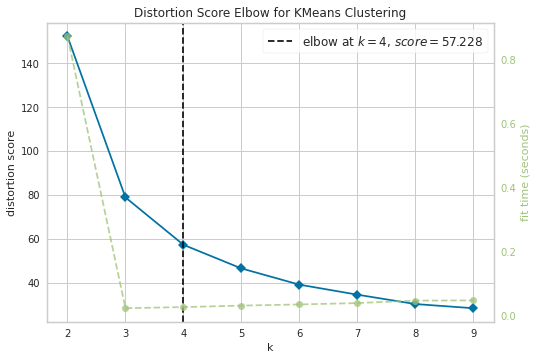

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Load the IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [12]:
#K-Means Clustering
from sklearn.cluster import KMeans

K=range(2,12)
wss = []

for k in K:
    kmeans=KMeans(n_clusters=k)  # (n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans=kmeans.fit(X_scaled)
    wss_ = kmeans.inertia_
    wss.append(wss_)

In [13]:
wss

[388.18846537282747,
 288.00522640922605,
 192.83422145456586,
 155.65438303484146,
 121.32722423380892,
 106.49993807467759,
 91.66466454587174,
 79.83145261721025,
 74.32410147681985,
 69.37085768583816]

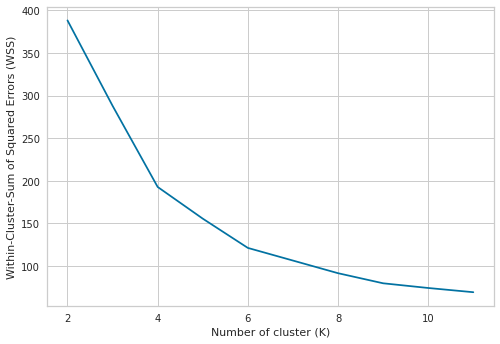

In [14]:
plt.xlabel('Number of cluster (K)')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

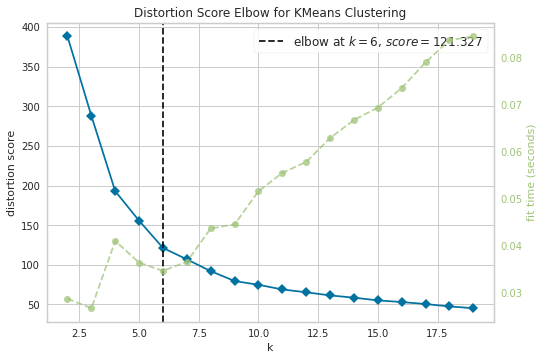

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#Elbow Method
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,20))
 
visualizer.fit(X_scaled)
visualizer.show()

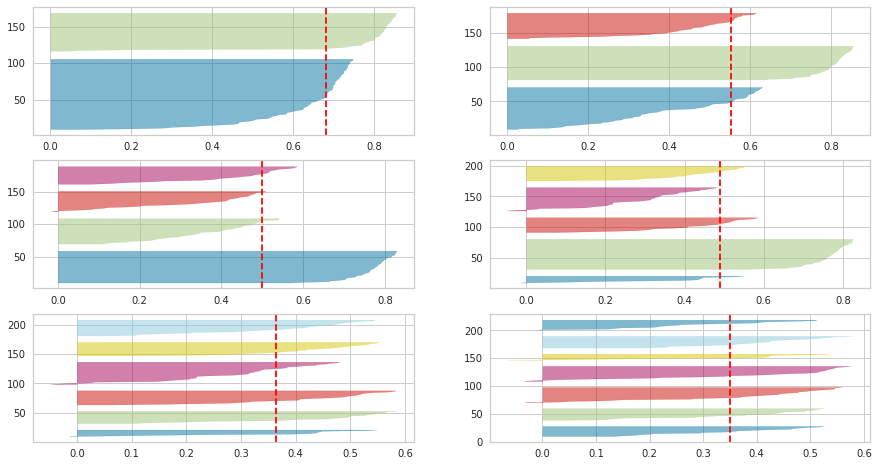

In [16]:
#Silhoutte score
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
#
# Load the IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

# Here is how the Silhouette plot would look like for different numbers of clusters ranging from 2 to 7 clusters.

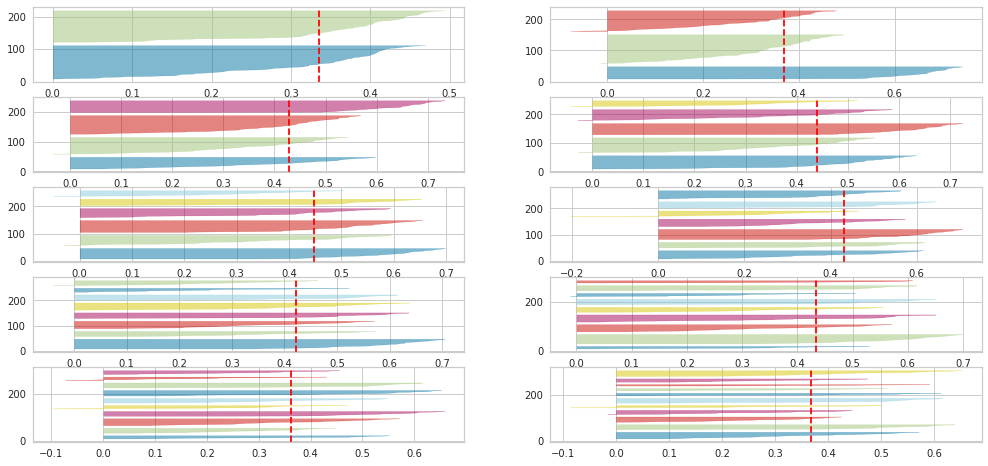

In [17]:
# Silhouette score
#classyellowbrick.cluster.silhouette.SilhouetteVisualizer(estimator, ax=None, colors=None, is_fitted='auto', **kwargs)

from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(5, 2, figsize=(17,8))
for i in range(2,12):
    '''
    Create KMeans instance for different number of clusters
    '''
    kmean = cluster.KMeans(n_clusters=i, init='k-means++')
    #kmean = KMeans(n_clusters=i, init='k-means++', n_init=170, max_iter=100, random_state=42)
    div, remender = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmean, colors='yellowbrick', ax=ax[div-1][remender])
    visualizer.fit(X_scaled) 

In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

for i in range(2,12):
    labels= cluster.KMeans(n_clusters=i, random_state=200)
    labels= labels.fit(X_scaled).labels_
    S_score = silhouette_score(X_scaled,labels ,metric="euclidean",sample_size=1000,random_state=200)
    print ("Silhouette score for k(clusters) = ", i, " : ", S_score)

Silhouette score for k(clusters) =  2  :  0.3357996936407186
Silhouette score for k(clusters) =  3  :  0.36894774533014385
Silhouette score for k(clusters) =  4  :  0.42920102513625347
Silhouette score for k(clusters) =  5  :  0.44040228930830644
Silhouette score for k(clusters) =  6  :  0.4489036464700897
Silhouette score for k(clusters) =  7  :  0.42961488961775385
Silhouette score for k(clusters) =  8  :  0.4198509931702013
Silhouette score for k(clusters) =  9  :  0.4291869329326775
Silhouette score for k(clusters) =  10  :  0.4053623295027365
Silhouette score for k(clusters) =  11  :  0.34944956728097026


In [19]:
# K-Mean Clustering with 6 Clusters

kmeans = KMeans(n_clusters=6 ,init="k-means++")
kmeans = kmeans.fit(X_scaled)
labels= kmeans.labels_
kmeans.cluster_centers_

array([[ 1.24826821, -0.27129662, -0.04259957],
       [-0.90705692, -0.0768557 , -0.1608857 ],
       [-0.44020295,  1.03755437,  1.23898001],
       [-0.9645557 , -1.36463916,  1.01540502],
       [ 0.48913953, -1.36362732, -1.19196185],
       [ 0.31982543,  1.1256091 , -1.23291241]])

In [20]:
df['Clusters'] = labels
df

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,0,1,1,0,30,3
1,1,1,3,0,67,3
2,2,0,2,1,4,4
3,3,0,5,1,64,3
4,4,0,13,2,31,4
...,...,...,...,...,...,...
195,195,0,17,61,66,2
196,196,0,27,62,23,5
197,197,1,14,62,61,2
198,198,1,14,63,16,5


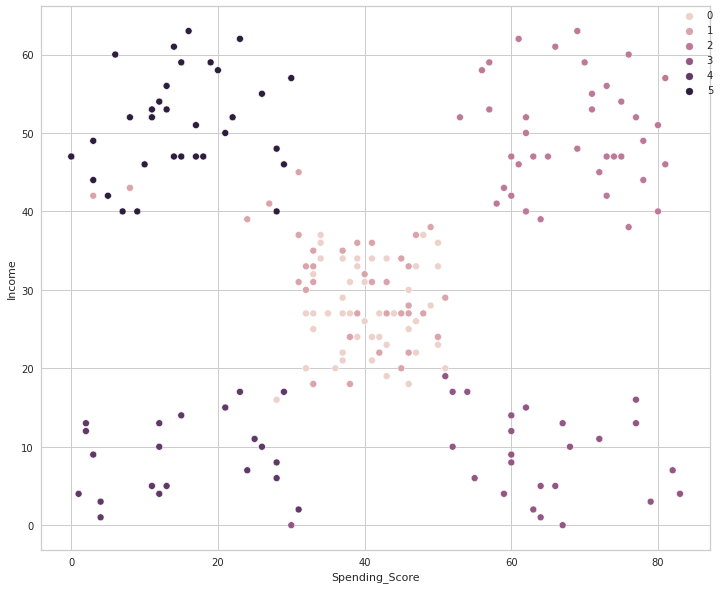

In [21]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

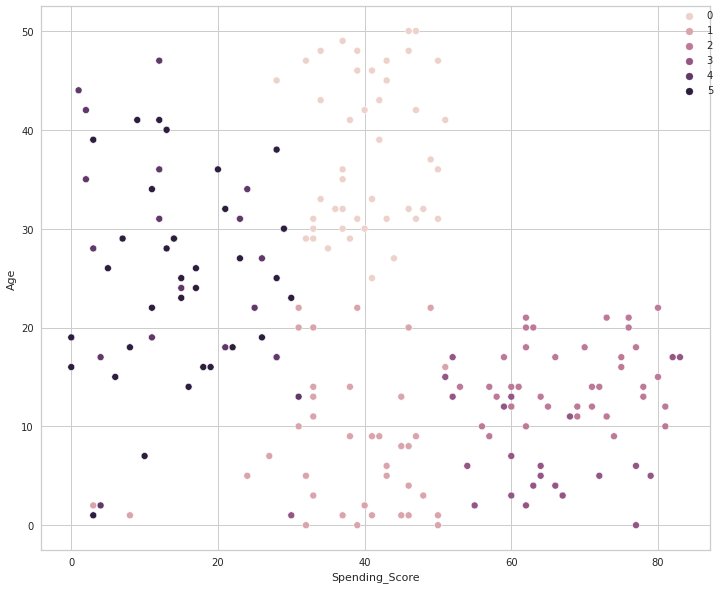

In [22]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Spending_Score", y="Age",hue = 'Clusters',  data=df)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

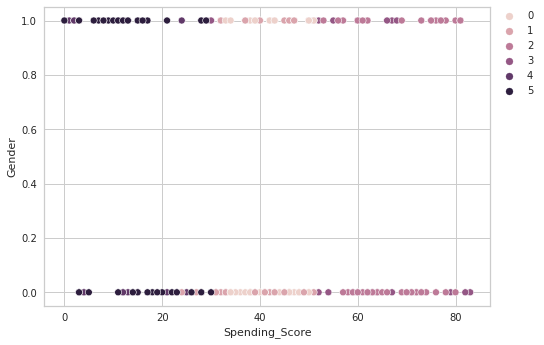

In [23]:
sns.scatterplot(x="Spending_Score", y="Gender",hue = 'Clusters',  data=df)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [24]:
# Example from documentation

import numpy as np
from sklearn.decomposition import PCA
X = df.values
pca = PCA(n_components=3)
pca.fit(X)
#PCA(n_components=2)
print(pca.explained_variance_ratio_)
#[0.9924... 0.0075...]
print(pca.singular_values_)
#[6.30061... 0.54980...]

[0.84597346 0.11684303 0.03630488]
[850.79811138 316.19104024 176.25062309]


In [27]:
# Running PCA with all components
pca = PCA(n_components=.95, random_state = 453)  # n_companenets = 
X_r = pca.fit_transform(X_scaled)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print(np.cumsum(pca.explained_variance_ratio_))
print("Total Variance in our dataset ifrom sklearn.decomposition import PCA n_components = X_scaled.shape[1]s: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)

[0.44354807 0.77677111 1.        ]
Total Variance in our dataset ifrom sklearn.decomposition import PCA n_components = X_scaled.shape[1]s:  3.015075376884421
The 95% variance we want to have is:  2.8643216080402


In [28]:
# Running PCA again

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=2)
kmeans = kmeans.fit(X_r)
labels= kmeans.labels_
kmeans.cluster_centers_

array([[ 11.56984367,  -0.88604505],
       [-33.01842292,   0.93552668],
       [ 66.84664492,  27.33035511],
       [-79.67781222, -27.45333691],
       [-81.093844  ,  24.75864068],
       [ 70.4543241 , -27.22829385]])

In [29]:
pca = PCA(n_components=.95, random_state = 21)
X_r = pca.fit_transform(X_r)

kmeans = KMeans(n_clusters=6, random_state=21)
kmeans = kmeans.fit(X_r)
labels= kmeans.labels_
kmeans.cluster_centers_

array([[ 70.4543241 , -27.22829385],
       [-79.67781222, -27.45333691],
       [-34.0481966 ,   1.06053593],
       [ 66.84664492,  27.33035511],
       [ 10.52607007,  -0.92257335],
       [-81.093844  ,  24.75864068]])

In [30]:
df['Clusters_95'] = labels
df

,CustomerID,Gender,Age,Income,Spending_Score,Clusters,Clusters_95
0,0,1,1,0,30,3,5
1,1,1,3,0,67,3,1
2,2,0,2,1,4,4,5
3,3,0,5,1,64,3,1
4,4,0,13,2,31,4,5
...,...,...,...,...,...,...,...
195,195,0,17,61,66,2,0
196,196,0,27,62,23,5,3
197,197,1,14,62,61,2,0
198,198,1,14,63,16,5,3


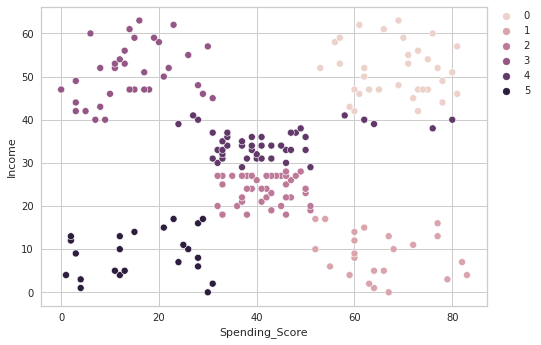

In [31]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters_95',  data=df)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

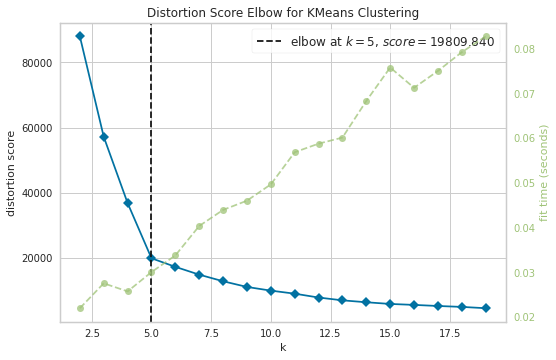

Silhouette score for k(clusters) =  2  :  0.35428471877029866
Silhouette score for k(clusters) =  3  :  0.45816794039111136
Silhouette score for k(clusters) =  4  :  0.5070180562566416
Silhouette score for k(clusters) =  5  :  0.5702893057417247
Silhouette score for k(clusters) =  6  :  0.46615004322107234
Silhouette score for k(clusters) =  7  :  0.47796692565896626
Silhouette score for k(clusters) =  8  :  0.4475628168551957
Silhouette score for k(clusters) =  9  :  0.427117076463184
Silhouette score for k(clusters) =  10  :  0.39286348643374824
Silhouette score for k(clusters) =  11  :  0.39830556035629683

Number of cluster select with Silhoutte score as max :  5


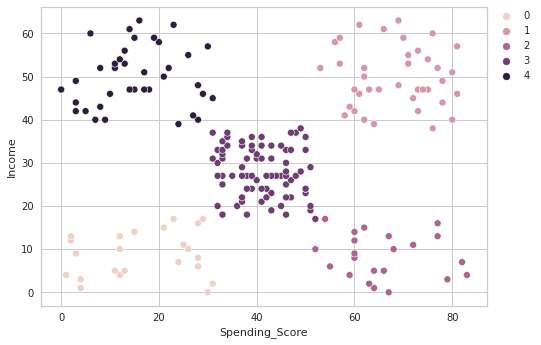

In [32]:
df_1= df[['Income', 'Spending_Score']]

pca = PCA(n_components=.95, random_state = 453)
X_r = pca.fit_transform(df_1)

K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_1)
    wss_ = kmeans.inertia_
    wss.append(wss_)

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,20))
 
visualizer.fit(df_1)
visualizer.show()    
 
Sil_score = []
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
for i in range(2,12):
    labels= cluster.KMeans(n_clusters=i, random_state=200)
    labels= labels.fit(df_1).labels_
    S_score = silhouette_score(df_1,labels ,metric="euclidean",sample_size=1000,random_state=200)
    Sil_score.append(S_score)
    print ("Silhouette score for k(clusters) = ", i, " : ", S_score)
    
cluster_selection= Sil_score.index(max(Sil_score))+2
print('\nNumber of cluster select with Silhoutte score as max : ', cluster_selection)
kmeans = KMeans(n_clusters=cluster_selection, random_state=2)
kmeans = kmeans.fit(df_1)
Kmeans_labels= kmeans.labels_
kmeans.cluster_centers_
df_1['Clusters_In_SpS'] = Kmeans_labels

sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters_In_SpS',  data=df_1)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [33]:
cluster_dataframe = df_1.groupby('Clusters_In_SpS').size().to_frame()
cluster_dataframe.columns = ["Count"]
cluster_dataframe

,Count
Clusters_In_SpS,
0,23
1,39
2,22
3,78
4,38


In [34]:
df_1.groupby('Clusters_In_SpS').count()

,Income,Spending_Score
Clusters_In_SpS,,
0,23,23
1,39,39
2,22,22
3,78,78
4,38,38


In [35]:
data= pd.read_csv('un.csv')
data.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data.describe()

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
count,197.000000,144.000000,76.000000,76.000000,196.00000,196.000000,201.000000,197.000000,165.000000,165.000000,160.000000,160.000000
mean,3.528782,43.430556,11.410526,11.275000,63.62551,68.391837,43.477612,6261.954315,76.460606,46.794545,17.554662,27.906200
std,1.761974,23.706732,3.049834,3.475135,9.78687,11.041234,38.756041,9355.659390,7.687047,16.810472,17.813000,26.580664
min,1.190000,2.000000,3.300000,2.000000,36.00000,39.100000,2.000000,36.000000,51.200000,1.900000,0.200000,0.200000
25%,1.950000,21.000000,9.750000,9.325000,57.37500,59.600000,12.000000,442.000000,72.300000,37.000000,2.952000,4.847000
50%,3.070000,47.000000,11.250000,11.650000,66.50000,72.150000,30.000000,1779.000000,76.800000,48.400000,10.829000,20.100000
75%,4.980000,64.000000,13.900000,13.650000,70.90000,76.425000,66.000000,7272.000000,81.200000,56.400000,27.575000,48.025000
max,8.000000,86.000000,17.200000,17.800000,77.40000,82.900000,169.000000,42416.000000,93.000000,90.600000,79.100000,93.400000


In [37]:
new_df=data[['country', 'region', 'tfr',
        'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita']]
new_df

,country,region,tfr,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,6.90,45.0,46.0,154.0,2848.0
1,Albania,Europe,2.60,68.0,74.0,32.0,863.0
2,Algeria,Africa,3.81,67.5,70.3,44.0,1531.0
3,American.Samoa,Asia,NaN,68.0,73.0,11.0,NaN
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202,Western.Sahara,Africa,3.98,59.8,63.1,64.0,NaN
203,Yemen,Asia,7.60,57.4,58.4,80.0,732.0
204,Yugoslavia,Europe,1.80,69.8,75.3,19.0,1487.0
205,Zambia,Africa,5.49,42.2,43.7,103.0,382.0


In [38]:
new_df.dropna(inplace=True)

In [39]:
new_df.corr()

,tfr,lifeMale,lifeFemale,infantMortality,GDPperCapita
tfr,1.000000,-0.795030,-0.852934,0.833300,-0.480362
lifeMale,-0.795030,1.000000,0.981496,-0.929211,0.572767
lifeFemale,-0.852934,0.981496,1.000000,-0.949192,0.561626
infantMortality,0.833300,-0.929211,-0.949192,1.000000,-0.515471
GDPperCapita,-0.480362,0.572767,0.561626,-0.515471,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


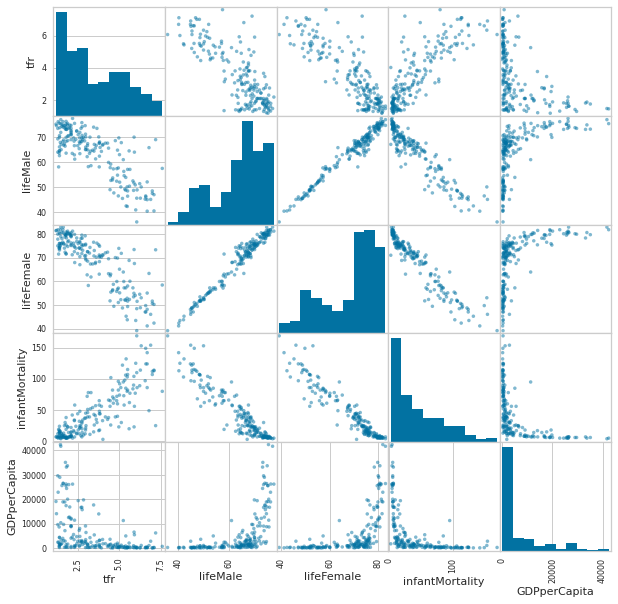

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_df,figsize=(10,10));

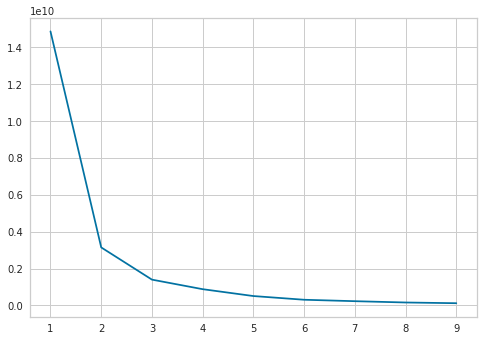

In [41]:
X=new_df.select_dtypes("float")
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(X) for k in range(1,10)]
inertia=[model.inertia_ for model in kmeans_per_k]

plt.plot(range(1,10),inertia)

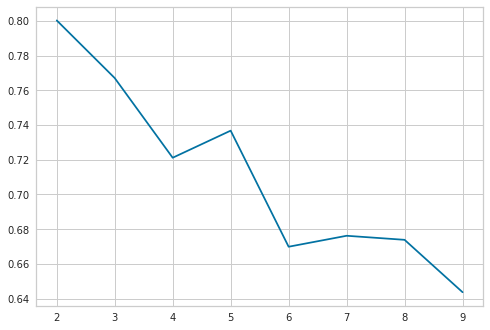

In [42]:
sil_score=[silhouette_score(X,model.labels_) for model in  kmeans_per_k[1:]]
plt.plot(range(2,10),sil_score)

In [43]:
kmeans=KMeans(3)
kmeans.fit(X)
kmeans.cluster_centers_

array([[2.26517241e+00, 7.24862069e+01, 7.81965517e+01, 1.28275862e+01,
        1.38005862e+04],
       [3.97398601e+00, 6.04608392e+01, 6.49195804e+01, 5.50139860e+01,
        1.62453846e+03],
       [1.67562500e+00, 7.46812500e+01, 8.06812500e+01, 5.68750000e+00,
        2.96816250e+04]])

In [44]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
new_df["Clusters"]=kmeans.labels_

In [46]:
new_df[new_df.Clusters==1]

,country,region,tfr,lifeMale,lifeFemale,infantMortality,GDPperCapita,Clusters
0,Afghanistan,Asia,6.90,45.0,46.0,154.0,2848.0,1
1,Albania,Europe,2.60,68.0,74.0,32.0,863.0,1
2,Algeria,Africa,3.81,67.5,70.3,44.0,1531.0,1
5,Angola,Africa,6.69,44.9,48.1,124.0,355.0,1
8,Armenia,Europe,1.70,67.2,74.0,25.0,354.0,1
...,...,...,...,...,...,...,...,...
200,Viet.Nam,Asia,2.97,64.9,69.6,37.0,270.0,1
203,Yemen,Asia,7.60,57.4,58.4,80.0,732.0,1
204,Yugoslavia,Europe,1.80,69.8,75.3,19.0,1487.0,1
205,Zambia,Africa,5.49,42.2,43.7,103.0,382.0,1


In [47]:
new_df.Clusters.value_counts()

1    143
0     29
2     16
Name: Clusters, dtype: int64

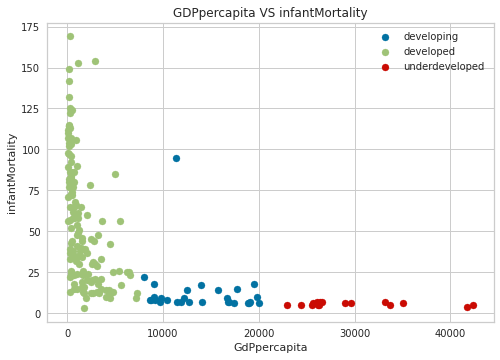

In [48]:
def plot_graph(kmeans,X):
    z=kmeans.predict(X)
    plt.scatter(X.values[z==0,4],X.values[z==0,3], label="developing")
    plt.scatter(X.values[z==1,4],X.values[z==1,3], label="developed")
    plt.scatter(X.values[z==2,4],X.values[z==2,3], label="underdeveloped")
    plt.title("GDPpercapita VS infantMortality")
    plt.xlabel("GdPpercapita")
    plt.ylabel("infantMortality")
    plt.legend()

plot_graph(kmeans,X)

In [49]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X,y=load_digits(return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.25, random_state=42)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [50]:
log_reg=LogisticRegression(multi_class="ovr",random_state=42,max_iter=2000,C=0.001)
log_reg.fit(X_train,y_train)
print('training score: ', log_reg.score(X_train, y_train))
print('test score: ', log_reg.score(X_test, y_test))

training score:  0.961395694135115
test score:  0.9577777777777777


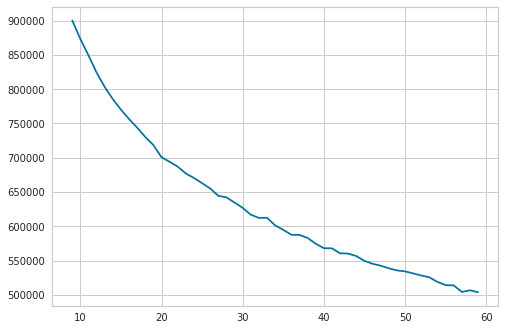

In [51]:
sil_score=[]
score=[]
for i in range(9,60):
    model=KMeans(n_clusters=i)
    model.fit(X_train)
    score.append(model.inertia_)
    sil_score.append(silhouette_score(X_train,model.labels_))
    
plt.plot(range(9,60),score)

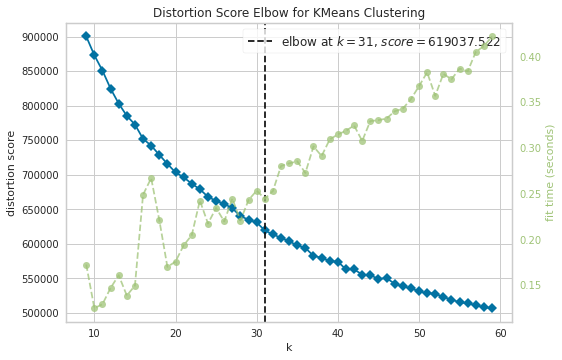

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(9,60))
 
visualizer.fit(X_train)
visualizer.show()

In [53]:
from sklearn.pipeline import Pipeline
option_= [9,10, 15, 25, 30, 31, 33, 34, 40, 42, 45, 47, 50]
for i in option_:
    pipe=Pipeline([
        ("Kmean", KMeans(n_clusters=i,random_state=42)),
        ("logreg", LogisticRegression(max_iter=2000,random_state=42,multi_class="ovr"))
    ])
    pipe.fit(X_train,y_train)
    print('n_cluster as ', i)
    print('train: ', pipe.score(X_train,y_train), '      test: ', pipe.score(X_test,y_test), '\n')

n_cluster as  9
train:  0.9161098737936154       test:  0.8955555555555555 

n_cluster as  10
train:  0.9391239792130661       test:  0.9333333333333333 

n_cluster as  15
train:  0.9695619896065331       test:  0.9555555555555556 

n_cluster as  25
train:  0.9851521900519673       test:  0.9666666666666667 

n_cluster as  30
train:  0.9881217520415738       test:  0.9733333333333334 

n_cluster as  31
train:  0.9925760950259837       test:  0.9755555555555555 

n_cluster as  33
train:  0.9896065330363771       test:  0.9755555555555555 

n_cluster as  34
train:  0.9910913140311804       test:  0.9733333333333334 

n_cluster as  40
train:  0.9933184855233853       test:  0.9777777777777777 

n_cluster as  42
train:  0.9933184855233853       test:  0.9755555555555555 

n_cluster as  45
train:  0.9962880475129918       test:  0.98 

n_cluster as  47
train:  0.9948032665181886       test:  0.9777777777777777 

n_cluster as  50
train:  0.9962880475129918       test:  0.9777777777777777 



In [54]:
pipe=Pipeline([
    ("Kmean", KMeans(n_clusters=45,random_state=42)),
    ("logreg", LogisticRegression(max_iter=2000,random_state=42,multi_class="ovr"))
])
pipe.fit(X_train,y_train)

print('train: ', pipe.score(X_train,y_train))
print('test: ', pipe.score(X_test,y_test))

train:  0.9962880475129918
test:  0.98
